Ипотртируем необходимые библиотеки

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import sqlite3

Загружаем набор данных 'diamonds' из библиотеки seaborn

In [52]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
#Подключение к БД и создание таблицы diamonds
con = sqlite3.connect(":memory:")
cur = con.cursor()
diamonds.to_sql("diamonds", con,  index_label='id', if_exists = 'replace')

53794

In [59]:
pd.read_sql(
"""
SELECT * FROM diamonds
limit 5
""",
    con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Наименование полей:**
*   **carat** - вес в каратах;
*   **cut** - качество огранки (Удовлетворительное, Хорошее, Очень хорошее, Премиум, Идеальное);
*   **color** - цвет от J до D (определяется по Международной системе GIA https://diams.ru/GIA-cvet-brillianta)
*   **clarity** - чистота/прозрачность (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))
*   **depth** - общая толщина в процентах = z / mean(x, y) = 2 * z / (x + y)(43--79)
*   **table** - ширина вершины брилианта относительно самого широкого места (43–95)
*   **price** - цена;
*   **x** - длина, мм;
*   **y** - ширина, мм;
*   **z** - толщина, мм.

In [53]:
#Посмотрим типы данных
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


7 численных и 3 категориальных поля

In [54]:
#Проверяем на пропуски
diamonds.isnull().any().any()

False

In [60]:
pd.read_sql(
"""
    SELECT carat as col, COUNT(carat) as empty
    FROM diamonds
    WHERE carat IS NULL
    UNION ALL
    SELECT cut, COUNT(cut)
    FROM diamonds
    WHERE cut IS NULL    UNION ALL
    SELECT color, COUNT(color)
    FROM diamonds
    WHERE color IS NULL
    UNION ALL
    SELECT clarity, COUNT(clarity)
    FROM diamonds
    WHERE clarity IS NULL
    UNION ALL
    SELECT depth, COUNT(depth)
    FROM diamonds
    WHERE depth IS NULL
    UNION ALL
    SELECT price, COUNT(price)
    FROM diamonds
    WHERE price IS NULL
    UNION ALL
    SELECT x, COUNT(x)
    FROM diamonds
    WHERE x IS NULL
    UNION ALL
    SELECT y, COUNT(y)
    FROM diamonds
    WHERE y IS NULL
    UNION ALL
    SELECT z, COUNT(z)
    FROM diamonds
    WHERE z IS NULL
""",
    con,
)

,col,empty
0,None,0
1,None,0
2,None,0
3,None,0
4,None,0
5,None,0
6,None,0
7,None,0
8,None,0


Пропущенных значений нет

In [55]:
#Проверям дублирующиеся значения
diamonds.duplicated().sum()

146

In [56]:
#Найдено 146 дублирующихся строк. Сразу очистим датасет от дублей
diamonds = diamonds.drop_duplicates()
diamonds.shape

(53794, 10)

In [20]:
#Посмотрим основные статистические характеристики данных по каждому числовому признаку
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Сразу можно заметить аномальные значения размеров камней.
Например, есть нулевые значения по x, y, z, а также явно завышенные значения по y и z
При средней цене 3933 и среднем x = 5.731157, y = 5.734526, z = 3.538734, явными выбросами можно считать следующие значения:
*   y = 58.90 при price 12210 (здесь же z = 8.06 и занчение depth расчитано неверно(верное значение по формуле = 24))
*   y = 31.80, при price = 2075
*   z = 31.80 при price = 1970

In [21]:
#Посмотрим распределения по размерам
px.histogram(diamonds, x = 'x', marginal = 'box')


In [22]:
px.histogram(diamonds, x = 'y', marginal = 'box')


In [61]:
px.histogram(diamonds, x = 'z', marginal = 'box')


Проверим количество выбросов

Выбросами будем считать значения:
*   x = 0 и x > 11
*   y = 0 и y > 11
*   z = 0 и z > 7






In [62]:
diamonds.loc[((diamonds['x'] == 0) | (diamonds['x'] > 11)) | ((diamonds['y'] == 0) | (diamonds['y'] > 11)) | ((diamonds['z'] == 0) | (diamonds['z'] > 7))]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


In [63]:
diamonds.loc[((diamonds['x'] == 0) | (diamonds['x'] > 11)) | ((diamonds['y'] == 0) | (diamonds['y'] > 11)) | ((diamonds['z'] == 0) | (diamonds['z'] > 7))].count()

carat      22
cut        22
color      22
clarity    22
depth      22
table      22
price      22
x          22
y          22
z          22
dtype: int64

In [64]:
pd.read_sql(
"""
SELECT *
FROM diamonds
WHERE (x = 0 OR x > 11) OR (y = 0 OR y > 11) OR (z = 0 OR z > 11)

""",
    con = con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
1,2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
2,4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
3,5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
4,10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
5,11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
6,11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
7,13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
8,15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
9,24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


Найдено 22 строки с выбросами

Так как доля выбросов невелика, удаляем их

Для дальнейшей работы буду использовать копию датафрейма


In [65]:
#Создаем копию датафрейма без выбросов по размерам
diamonds_copy = diamonds.copy()
diamonds_copy.drop(diamonds_copy.loc[((diamonds_copy['x'] == 0) | (diamonds_copy['x'] > 11)) | ((diamonds_copy['y'] == 0) | (diamonds_copy['y'] > 11)) | ((diamonds_copy['z'] == 0) | (diamonds_copy['z'] > 7))].index, inplace = True)
diamonds_copy.describe()

,carat,depth,table,price,x,y,z
count,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000
mean,0.797525,61.748283,57.457911,3931.137321,5.731557,5.733446,3.539325
std,0.473150,1.429626,2.233262,3985.853004,1.118590,1.110500,0.691068
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [ ]:
pd.read_sql_query(
"""
CREATE TABLE diamonds_copy AS
SELECT *
FROM diamonds
WHERE id NOT IN
(
SELECT id
FROM diamonds
WHERE (x = 0 OR x > 11) OR (y = 0 OR y > 11) OR (z = 0 OR z > 11)
)
""",
    con = con,
)

In [68]:
pd.read_sql_query(
"""
SELECT * FROM diamonds_copy
WHERE x = 0 OR y = 0 OR z = 0
""",
    con = con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z


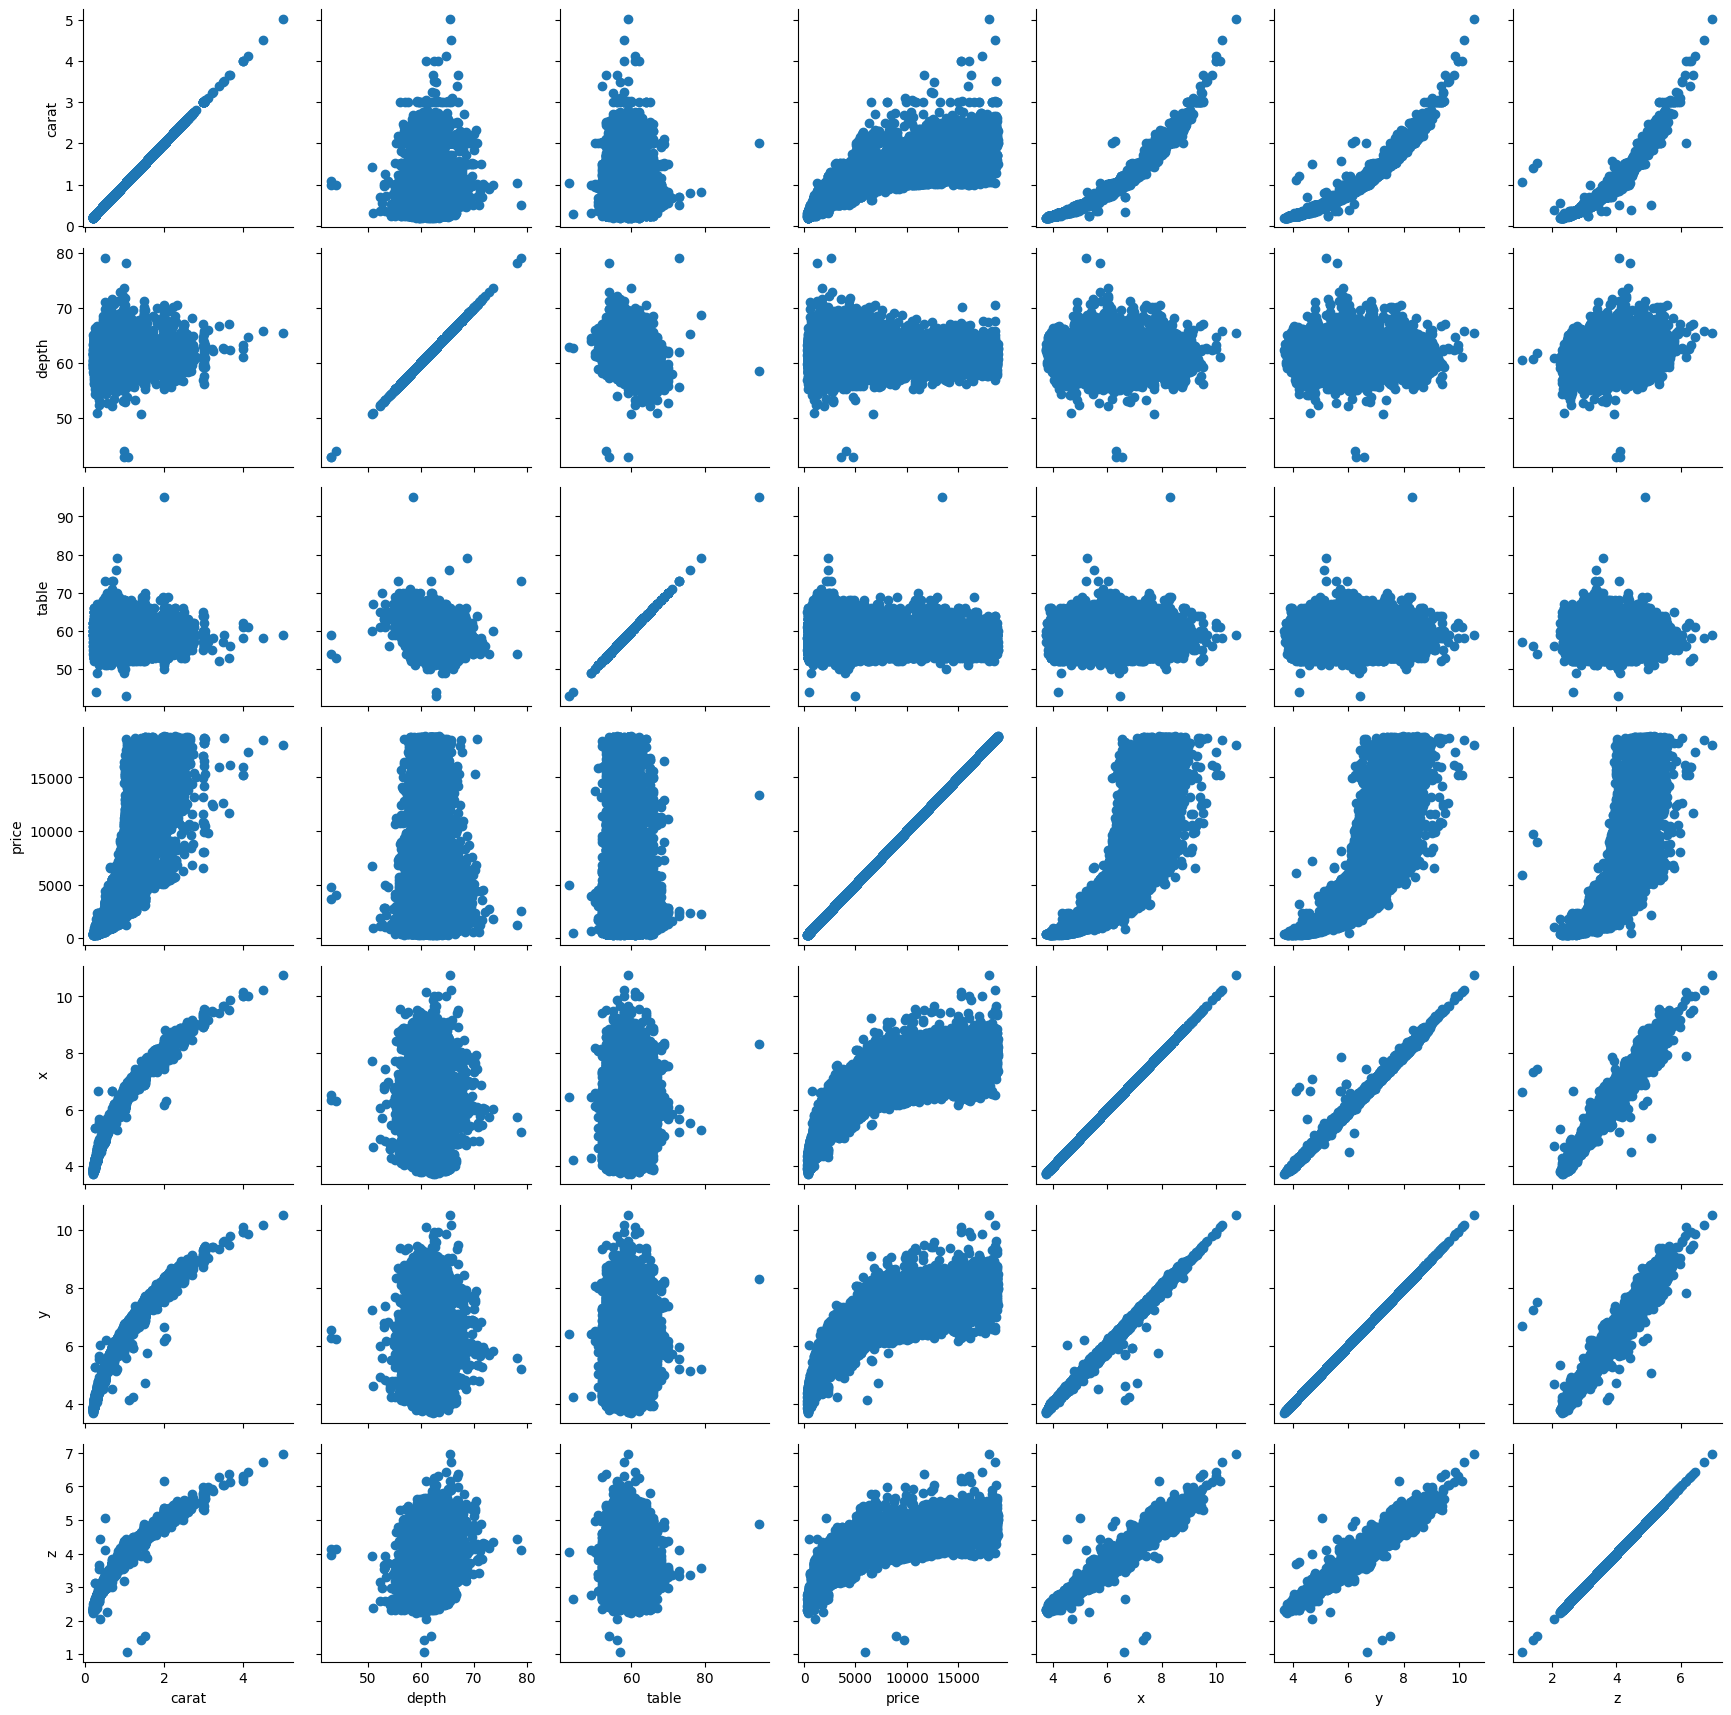

In [26]:
#Посмотрим на зависимости численных знаений
pair_grid_plot = sns.PairGrid(diamonds_copy)
pair_grid_plot.map(plt.scatter)

Все ожидаемо

Вес зависит от размеров

Цена зависит от размеров и веса

In [69]:
#Посмотрим количество камней в разрезе цветов
diamonds_copy.groupby(['color']).size()

color
D     6754
E     9774
F     9517
G    11254
H     8265
I     5406
J     2802
dtype: int64

In [70]:
pd.read_sql_query(
"""
SELECT color, COUNT(id)
FROM diamonds_copy
GROUP BY color
""",
    con = con,
)

,color,COUNT(id)
0,D,6754
1,E,9774
2,F,9517
3,G,11254
4,H,8265
5,I,5406
6,J,2802


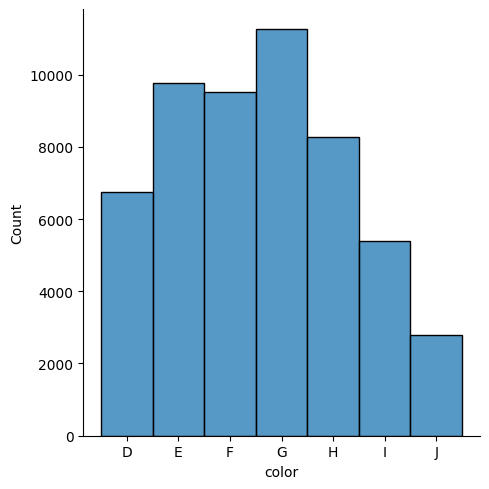

In [28]:
sns.displot(diamonds_copy['color'])

Самый распространенный G, самый редкий J

In [71]:
#Проверим, является ли самый редкий цвет самым дорогим. И вообще, как цвет влияет на стоимость
diamonds_copy.groupby(['color']).price.mean()

color
D    3172.588540
E    3079.824330
F    3726.776820
G    3999.088502
H    4476.167574
I    5079.843137
J    5326.415418
Name: price, dtype: float64

In [72]:
pd.read_sql_query(
"""
SELECT color, AVG(price)
FROM diamonds_copy
GROUP BY color
""",
    con = con,
)

,color,AVG(price)
0,D,3172.588540
1,E,3079.824330
2,F,3726.776820
3,G,3999.088502
4,H,4476.167574
5,I,5079.843137
6,J,5326.415418


<Axes: xlabel='price', ylabel='color'>

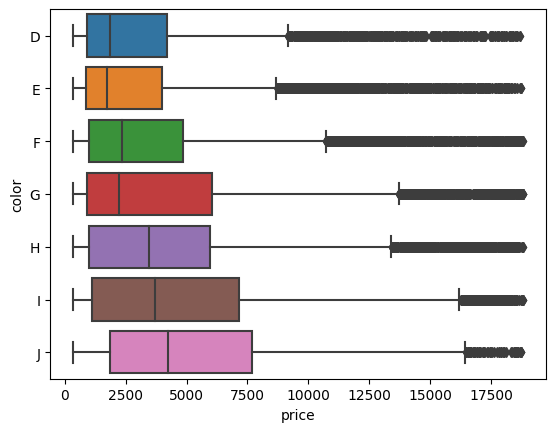

In [30]:
sns.boxplot(data = diamonds_copy, x = 'price', y = 'color')

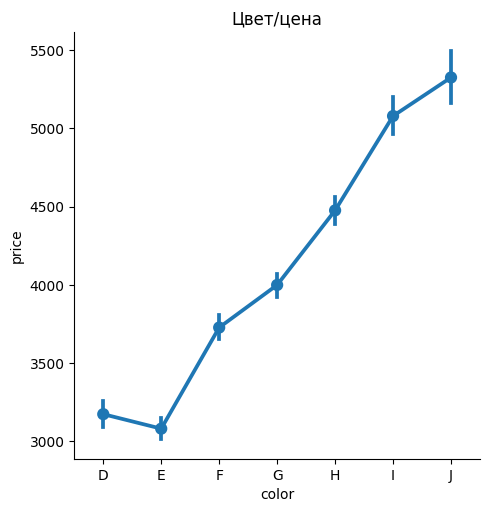

In [31]:
sns.catplot(data=diamonds_copy, x='color', y='price', kind='point')
plt.title("Цвет/цена")
plt.show()

Действительно, самый редкий цвет, является самым дорогим

Но стоит проверить, возможно цена брилиантов цвета J выше, потому что они самые большие или имеют самую лучшую огранку.

In [73]:
#Посмотрим на цвета  в разрезе веса
diamonds_copy.groupby(['color']).carat.mean()

color
D    0.658235
E    0.657988
F    0.736603
G    0.770811
H    0.910269
I    1.024970
J    1.162841
Name: carat, dtype: float64

In [74]:
pd.read_sql_query(
"""
SELECT color, AVG(carat)
FROM diamonds_copy
GROUP BY color
""",
    con = con,
)

,color,AVG(carat)
0,D,0.658235
1,E,0.657988
2,F,0.736603
3,G,0.770811
4,H,0.910269
5,I,1.024970
6,J,1.162841


<Axes: xlabel='carat', ylabel='color'>

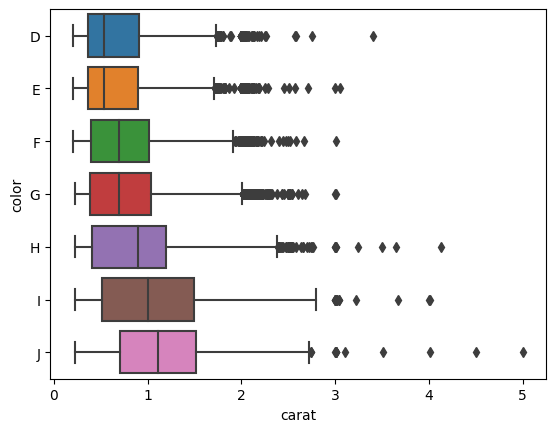

In [33]:
sns.boxplot(data = diamonds_copy, x = 'carat', y = 'color')

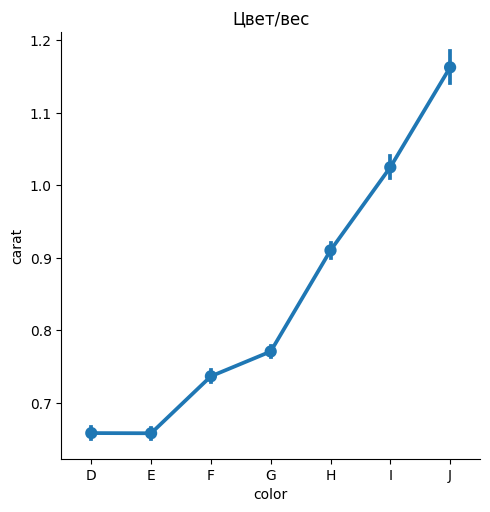

In [34]:
sns.catplot(data=diamonds_copy, x='color', y='carat', kind='point')
plt.title("Цвет/вес")
plt.show()

Можем увидеть, что средний вес камня цвета J выше остальных, значит сам по себе цвет не влияет на стоимость, но можем сделать вывод, что камни этого цвета самые крупные

In [75]:
#Цвет в разрезе огранки
diamonds_copy.groupby(['cut', 'color'])['price'].count()

cut        color
Ideal      D        2823
           E        3892
           F        3818
           G        4863
           H        3104
           I        2090
           J         894
Premium    D        1598
           E        2331
           F        2320
           G        2915
           H        2345
           I        1421
           J         806
Very Good  D        1510
           E        2398
           F        2163
           G        2298
           H        1818
           I        1203
           J         677
Good       D         660
           E         931
           F         907
           G         867
           H         699
           I         518
           J         306
Fair       D         163
           E         222
           F         309
           G         311
           H         299
           I         174
           J         119
Name: price, dtype: int64

In [ ]:
pd.read_sql_query(
"""
CREATE VIEW cut_color AS
SELECT COUNT(id) as count, color
FROM diamonds
GROUP BY color
""",
    con = con,
)

In [78]:
pd.read_sql_query(
"""
SELECT d.cut,
COUNT(CASE WHEN d.color = 'D' THEN cc.count END) AS D,
COUNT(CASE WHEN d.color = 'E' THEN cc.count END) AS E,
COUNT(CASE WHEN d.color = 'F' THEN cc.count END) AS F,
COUNT(CASE WHEN d.color = 'G' THEN cc.count END) AS G,
COUNT(CASE WHEN d.color = 'H' THEN cc.count END) AS H,
COUNT(CASE WHEN d.color = 'I' THEN cc.count END) AS I,
COUNT(CASE WHEN d.color = 'J' THEN cc.count END) AS J
FROM diamonds d
LEFT JOIN cut_color cc
ON cc.color = d.color
GROUP BY d.cut
""",
    con = con,
)

,cut,D,E,F,G,H,I,J
0,Fair,163,222,309,312,299,174,119
1,Good,660,931,908,869,699,518,306
2,Ideal,2823,3893,3819,4865,3104,2090,894
3,Premium,1599,2331,2321,2918,2351,1422,806
4,Very Good,1510,2399,2163,2298,1819,1203,677


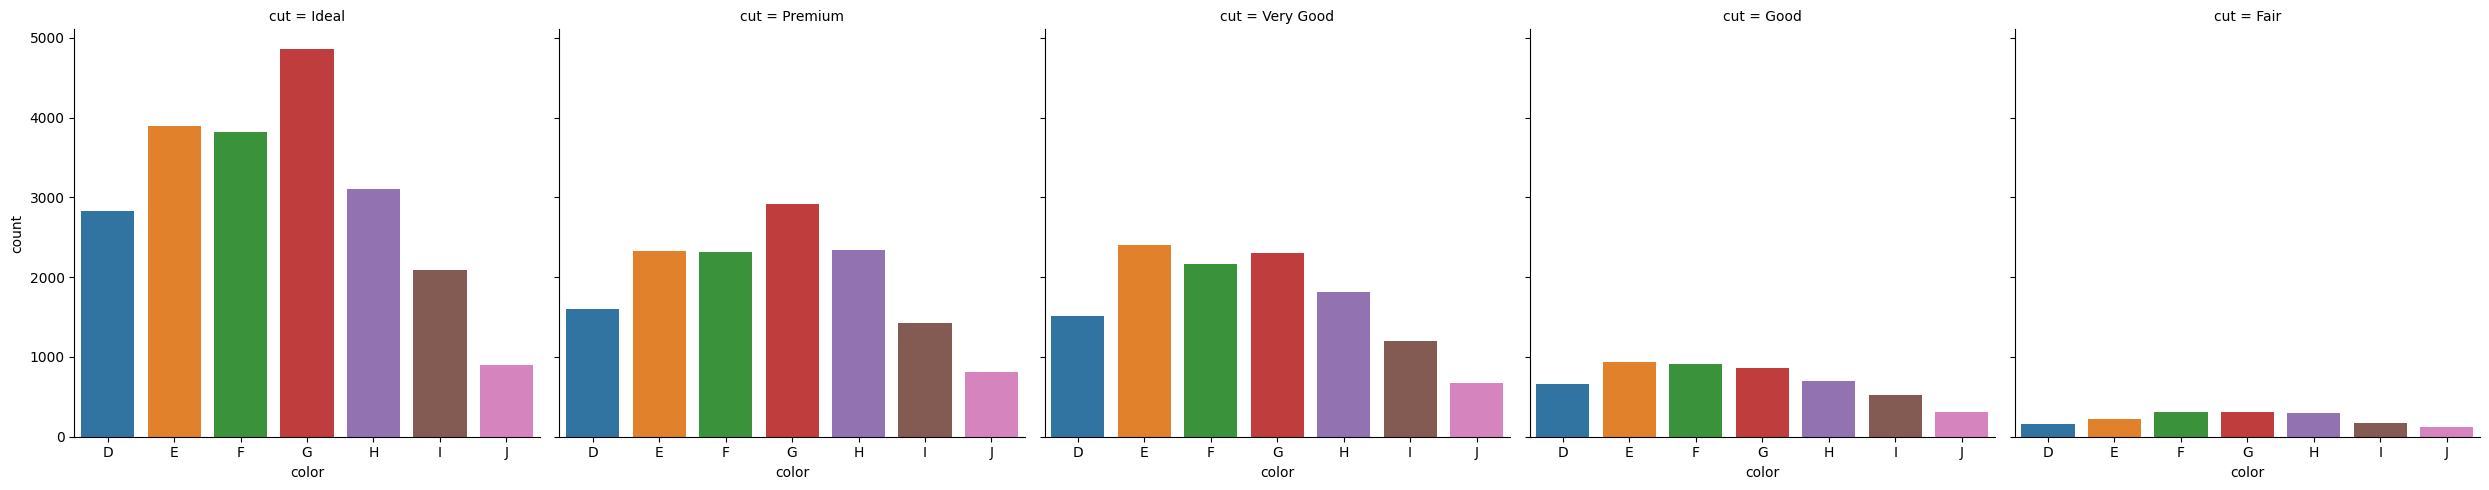

In [87]:
sns.catplot(x = 'color', col = 'cut', kind = 'count', data = diamonds_copy)

In [142]:
#Посмотрим на цвета в разрезе огранки и отсортиуем относительные значения по индексу(огранке)
pd.crosstab(diamonds_copy.cut, diamonds_copy.color, margins=True, normalize = 'index')

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,0.131400,0.181158,0.177714,0.226354,0.144480,0.097282,0.041612
Premium,0.116337,0.169700,0.168899,0.212216,0.170719,0.103451,0.058678
Very Good,0.125135,0.198724,0.179249,0.190437,0.150659,0.099693,0.056103
Good,0.135025,0.190466,0.185556,0.177373,0.143003,0.105974,0.062602
Fair,0.102066,0.139011,0.193488,0.194740,0.187226,0.108954,0.074515
All,0.125604,0.181767,0.176988,0.209291,0.153705,0.100536,0.052109


In [143]:
#Здесь отсортируем по цвету
pd.crosstab(diamonds_copy.cut, diamonds_copy.color, margins=True, normalize = 'columns').style.background_gradient(cmap='autumn_r')

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,0.417975,0.398199,0.401177,0.432113,0.375560,0.386607,0.319058,0.399539
Premium,0.236601,0.238490,0.243774,0.259019,0.283727,0.262856,0.287652,0.255449
Very Good,0.223571,0.245345,0.227278,0.204194,0.219964,0.222531,0.241613,0.224410
Good,0.097720,0.095253,0.095303,0.077039,0.084574,0.095819,0.109208,0.090902
Fair,0.024134,0.022713,0.032468,0.027635,0.036177,0.032186,0.042470,0.029699


Можно заметить, что камни качества J  имеют самую высокую долю огранки среди остальных  Fair и Good - худшую
Лучше всех огранены G

Все камни имеют приемущественно качество Ideal, Premium и Very Good

Прдварительный вывод - цена в большей степени зависит от веса

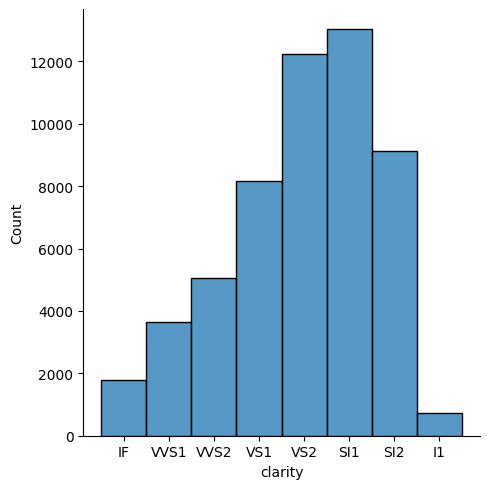

In [90]:
#Посмотрим, как обстоят дела с прозрачностью
sns.displot(diamonds_copy['clarity'])

Лучшие и худшие по прозрачности камни встречаются значительно реже остальных

In [91]:
#Средняя цена в разрезе прозрачности
diamonds_copy.groupby(['clarity']).price.mean()

clarity
IF      2870.569507
VVS1    2522.993692
VVS2    3286.532437
VS1     3841.746106
VS2     3925.614806
SI1     3994.271834
SI2     5053.746308
I1      3927.303935
Name: price, dtype: float64

In [81]:
pd.read_sql_query(
"""
SELECT clarity, AVG(price)
FROM diamonds_copy
GROUP BY clarity
""",
    con = con,
)

,clarity,AVG(price)
0,I1,3927.303935
1,IF,2870.569507
2,SI1,3994.271834
3,SI2,5053.746308
4,VS1,3841.746106
5,VS2,3925.614806
6,VVS1,2522.993692
7,VVS2,3286.532437


<Axes: xlabel='price', ylabel='clarity'>

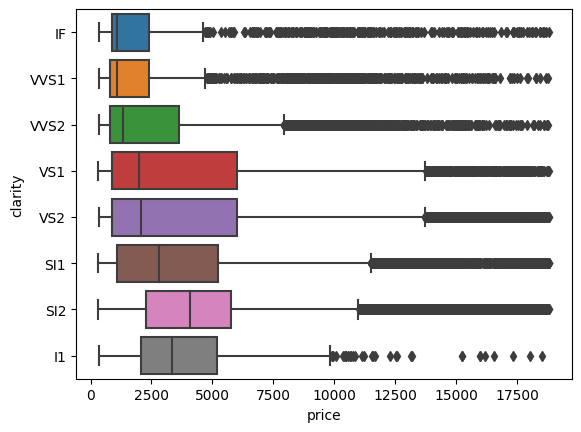

In [92]:
#график ценв/прозрачность
sns.boxplot(data = diamonds_copy, x = 'price', y = 'clarity')

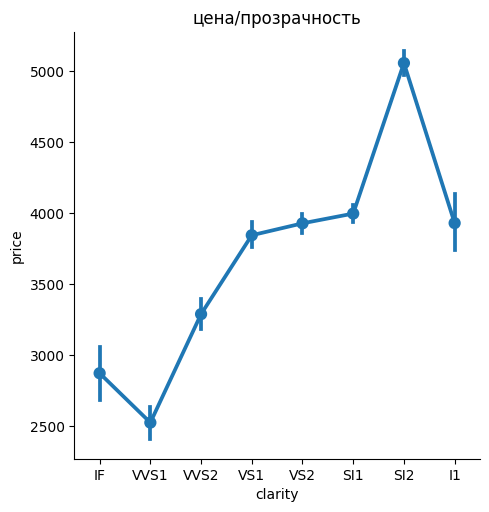

In [144]:
sns.catplot(data=diamonds_copy, x='clarity', y='price', kind='point')
plt.title("цена/прозрачность")
plt.show()

График не соответсвует ожиданиям.

Здесь мы видим, что самыми дорогими являются худшие по прозрачности камни

Объективно судить сложно, так как мы видим картину без учета веса.


In [94]:
#Посмотрим на показатель прозрачности в разрезе весов
diamonds_copy.groupby(['clarity']).carat.mean()

clarity
IF      0.505645
VVS1    0.503505
VVS2    0.596527
VS1     0.727439
VS2     0.764057
SI1     0.850196
SI2     1.075917
I1      1.283826
Name: carat, dtype: float64

In [82]:
pd.read_sql_query(
"""
SELECT clarity, AVG(carat)
FROM diamonds_copy
GROUP BY clarity
""",
    con = con,
)

,clarity,AVG(carat)
0,I1,1.283826
1,IF,0.505645
2,SI1,0.850196
3,SI2,1.075917
4,VS1,0.727439
5,VS2,0.764057
6,VVS1,0.503505
7,VVS2,0.596527


<Axes: xlabel='carat', ylabel='clarity'>

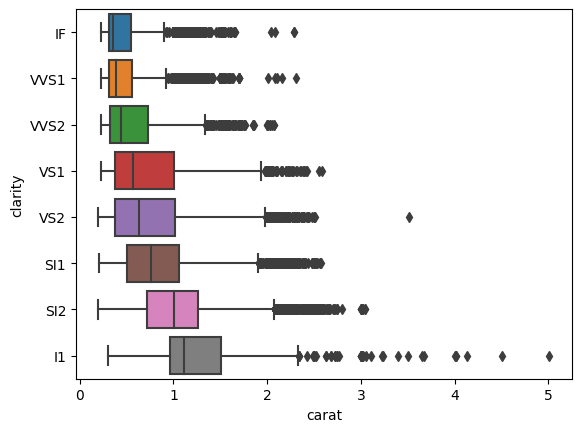

In [95]:
sns.boxplot(data = diamonds_copy, x = 'carat', y = 'clarity')

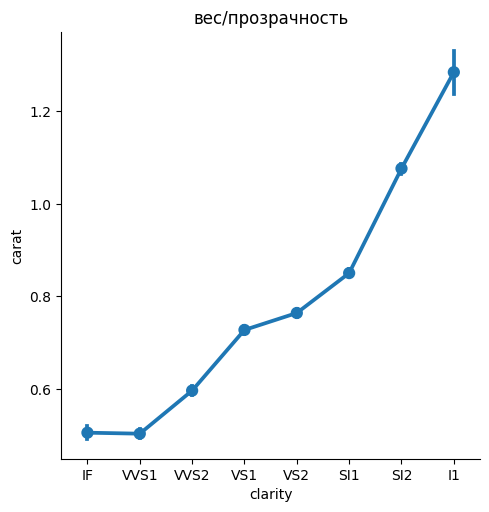

In [145]:
sns.catplot(data=diamonds_copy, x='clarity', y='carat', kind='point')
plt.title("вес/прозрачность")
plt.show()

Как и предполагалось, самые крупные имеют худшую степень прозрачности

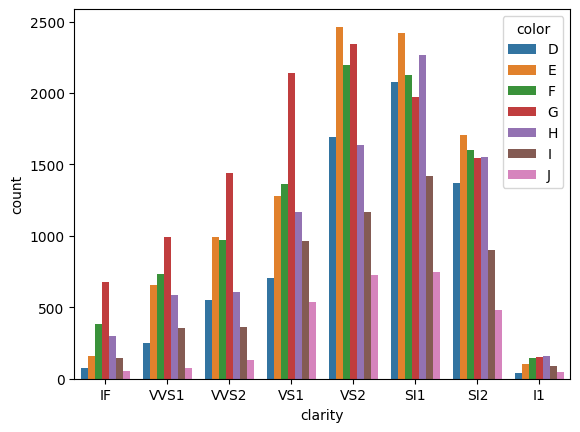

In [97]:
#Посмотрим также, как цвет камня влияет на прозрачность
sns.countplot(data=diamonds, x='clarity', hue='color')
plt.show()

In [98]:
#Цвет/прозрачность отсторировано по цвету
pd.crosstab(diamonds_copy.clarity, diamonds_copy.color, margins=True, normalize = 'columns').style.background_gradient(cmap='autumn_r')

color,D,E,F,G,H,I,J,All
clarity,,,,,,,,
IF,0.010808,0.016165,0.040244,0.060245,0.036056,0.026452,0.018201,0.033177
VVS1,0.036867,0.067117,0.077125,0.088413,0.070538,0.065668,0.026410,0.067805
VVS2,0.081877,0.101187,0.102133,0.128221,0.073079,0.067518,0.046395,0.094027
VS1,0.104383,0.130857,0.143112,0.190243,0.141077,0.177765,0.192363,0.151622
VS2,0.250370,0.252097,0.230955,0.207926,0.198064,0.215686,0.260171,0.227349
SI1,0.307077,0.247903,0.223495,0.174960,0.274289,0.262671,0.267666,0.242319
SI2,0.202399,0.174340,0.167910,0.136840,0.187417,0.167222,0.170949,0.169996
I1,0.006219,0.010334,0.015026,0.013151,0.019480,0.017018,0.017844,0.013706


Здесь мы видим, что камни цвета J(с самой высокой стоимостью и весом) имеют не самый высокую степень прозрачности, 89% из них имеют прозрачность от SI2 до VS1
А камни с цветом G на фоне остальных выделяются по уровню прозрачности

In [100]:
#Цвет/прозрачность отсторировано прозрачности
pd.crosstab(diamonds_copy.clarity, diamonds_copy.color, margins=True, normalize = 'index').style.background_gradient(cmap='autumn_r')

color,D,E,F,G,H,I,J
clarity,,,,,,,
IF,0.040919,0.088565,0.214686,0.380045,0.167040,0.080157,0.028587
VVS1,0.068294,0.179923,0.201317,0.272902,0.159901,0.097367,0.020296
VVS2,0.109375,0.195609,0.192247,0.285403,0.119462,0.072191,0.025712
VS1,0.086471,0.156875,0.167055,0.262603,0.143015,0.117871,0.066111
VS2,0.138323,0.201554,0.179796,0.191411,0.133906,0.095378,0.059632
SI1,0.159171,0.185955,0.163239,0.151113,0.173983,0.108979,0.057559
SI2,0.149546,0.186413,0.174817,0.168472,0.169456,0.098895,0.052401
I1,0.056988,0.137042,0.194030,0.200814,0.218453,0.124830,0.067843
All,0.125604,0.181767,0.176988,0.209291,0.153705,0.100536,0.052109


In [84]:
pd.read_sql_query(
"""
SELECT d.clarity,
COUNT(CASE WHEN d.color = 'D' THEN cc.count END) AS D,
COUNT(CASE WHEN d.color = 'E' THEN cc.count END) AS E,
COUNT(CASE WHEN d.color = 'F' THEN cc.count END) AS F,
COUNT(CASE WHEN d.color = 'G' THEN cc.count END) AS G,
COUNT(CASE WHEN d.color = 'H' THEN cc.count END) AS H,
COUNT(CASE WHEN d.color = 'I' THEN cc.count END) AS I,
COUNT(CASE WHEN d.color = 'J' THEN cc.count END) AS J
FROM diamonds d
LEFT JOIN cut_color cc
ON cc.color = d.color
GROUP BY d.clarity
""",
    con = con,
)

,clarity,D,E,F,G,H,I,J
0,I1,42,101,143,150,162,92,50
1,IF,73,158,383,678,298,143,51
2,SI1,2074,2423,2127,1969,2268,1421,750
3,SI2,1367,1704,1601,1543,1552,904,479
4,VS1,705,1281,1362,2142,1166,961,539
5,VS2,1691,2464,2198,2342,1639,1166,729
6,VVS1,250,656,734,995,583,355,74
7,VVS2,553,989,972,1443,604,365,130


Можно обратить внимание, что камни с лучшей степенью прозрачности (IF) имеют цвета F, G и H

Как ранее было замечено, мы не можем объективно судить о влиянии тех или иных показателей на цену без учета веса.

Поэтому добавим в датафрейм новое значение price_carat - цена за карат

In [35]:
#Создаем новую колонку price_carat
diamonds_copy['price_carat'] = diamonds_copy.apply(lambda row: row['price'] / row['carat'], axis = 1)
diamonds_copy.describe()

,carat,depth,table,price,x,y,z,price_carat
count,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000
mean,0.797525,61.748283,57.457911,3931.137321,5.731557,5.733446,3.539325,4009.143943
std,0.473150,1.429626,2.233262,3985.853004,1.118590,1.110500,0.691068,2013.079144
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,1051.162791
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,2478.418124
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3496.125000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000,4950.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000,17828.846154


In [ ]:
pd.read_sql_query(
"""
ALTER TABLE diamonds_copy
ADD column price_carat REAL AS (
  price / carat
)

""",
    con = con,
)

In [102]:
#price_carat/clarity
diamonds_copy.groupby(['clarity']).price_carat.mean()

clarity
IF      4263.184458
VVS1    3851.166069
VVS2    4205.713982
VS1     4157.539664
VS2     4081.466149
SI1     3849.267905
SI2     4010.373559
I1      2797.280291
Name: price_carat, dtype: float64

In [89]:
pd.read_sql_query(
"""
SELECT clarity, AVG(price_carat)
FROM diamonds_copy
GROUP BY clarity
""",
    con = con,
)

,clarity,AVG(price_carat)
0,I1,2797.280291
1,IF,4263.184458
2,SI1,3849.267905
3,SI2,4010.373559
4,VS1,4157.539664
5,VS2,4081.466149
6,VVS1,3851.166069
7,VVS2,4205.713982


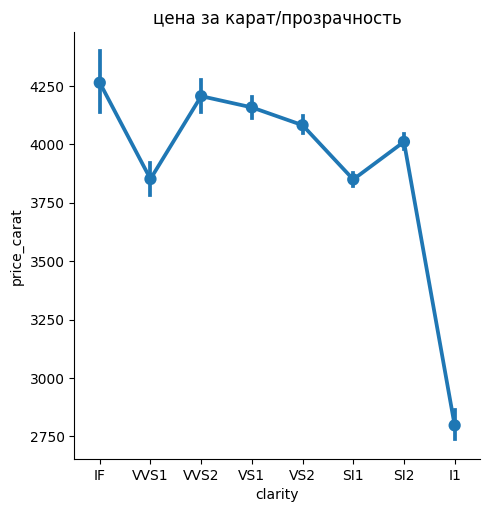

In [137]:
sns.catplot(data=diamonds_copy, x='clarity', y='price_carat', kind='point')
plt.title("цена за карат/прозрачность")
plt.show()

Этот график наиболее объективно показывает, что если мы не учитываем вес, цена сильно зависит от прозрачности

In [104]:
#То же самое повторим с цветом
diamonds_copy.groupby(['color']).price_carat.mean()

color
D    3954.182580
E    3806.910910
F    4136.107856
G    4165.228693
H    4006.580245
I    3993.206657
J    3827.233629
Name: price_carat, dtype: float64

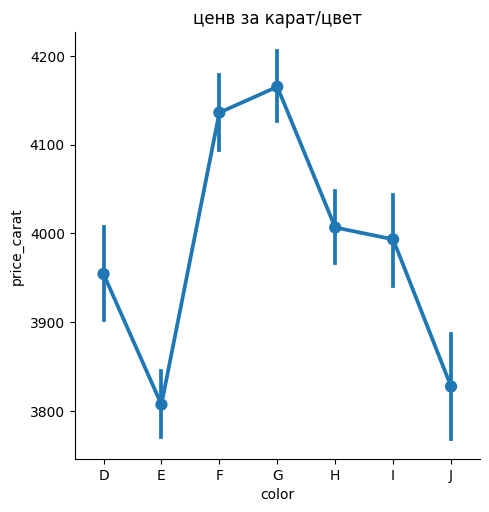

In [146]:
sns.catplot(data=diamonds_copy, x='color', y='price_carat', kind='point')
plt.title("ценв за карат/цвет")
plt.show()

На основании этого графика также можно скорректировать выводы, не беря в расчет вес камня, что камни с цветом G имеют в среднем лучшую прозрачность и самую высокую долю идеальной огранки (43%), что без учета веса делает их самыми дорогими

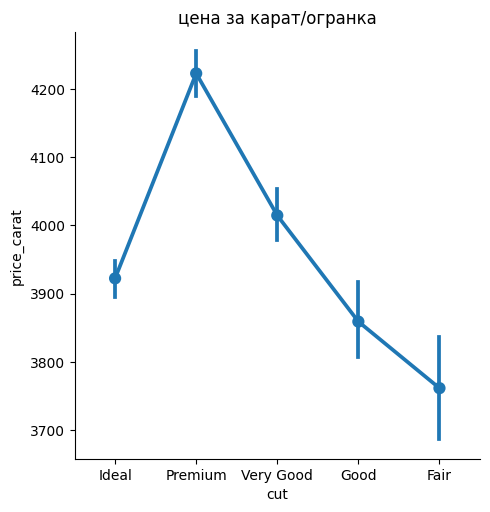

In [147]:
sns.catplot(data=diamonds_copy, x='cut', y='price_carat', kind='point')
plt.title("цена за карат/огранка")
plt.show()

Самыми дорогими являются камни с огранкой Premium

На этапе очистки данных от выбросов я не учитыввал выбросы по цене, так как, не являясь экспертом, не могу судить о том, насколько завышен данный показатель

Попробую оценить, на основе ранее увиденных наблюдений, как выглядит картина по выбросам цены

In [106]:
#Посмотрим на характеристики топ 10 самых дорогих камней
diamonds_copy.sort_values(by = 'price', ascending=False, inplace = True)
diamonds_copy.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_carat
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,8219.650655
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,9409.000000
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,12454.304636
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,9084.057971
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,9401.500000
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,8208.296943
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91,9397.500000
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84,9213.235294
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21,8740.000000
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70,10988.888889


In [90]:
pd.read_sql_query(
"""
SELECT * FROM diamonds_copy
ORDER BY price DESC
limit 10

""",
    con = con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z,price_carat
0,27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,8219.650655
1,27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,9409.000000
2,27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,12454.304636
3,27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,9084.057971
4,27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,9401.500000
5,27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,8208.296943
6,27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84,9213.235294
7,27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91,9397.500000
8,27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70,10988.888889
9,27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21,8740.000000


По этой выборке сложно сделать вывод, почему эти камни такие дорогие

Также, здесь можно найти противоречия ранее сделанным выводам, например, мы видим среди самых дорогих камней камни с невысокой прозрачностью, а также камни I и H
Подобные занчения  могут помешать найти линейную зависимость цены от параметров камня


Попробую выделить выбросы по цене, посчитать без них, а также отдельно по выбросам для поиска дополнительных зависимостей

In [107]:
#Посмотрим также на характеристики топ 10 камней с самой высокой стооимостью за карат
diamonds_copy.sort_values(by = 'price_carat', ascending=False, inplace = True)
diamonds_copy.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882
27349,1.07,Very Good,D,IF,59.0,59.0,17909,6.63,6.72,3.94,16737.383178
27507,1.09,Very Good,D,IF,61.7,58.0,18231,6.55,6.65,4.07,16725.688073
26660,1.00,Ideal,D,IF,60.7,57.0,16469,6.44,6.48,3.92,16469.000000
26549,1.01,Premium,D,IF,61.6,56.0,16234,6.46,6.43,3.97,16073.267327
26483,1.00,Very Good,D,IF,63.3,59.0,16073,6.37,6.33,4.02,16073.000000


In [92]:
pd.read_sql_query(
"""
SELECT * FROM diamonds_copy
ORDER BY price_carat DESC
limit 10

""",
    con = con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z,price_carat
0,27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154
1,27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570
2,27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903
3,27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963
4,26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882
5,27349,1.07,Very Good,D,IF,59.0,59.0,17909,6.63,6.72,3.94,16737.383178
6,27507,1.09,Very Good,D,IF,61.7,58.0,18231,6.55,6.65,4.07,16725.688073
7,26660,1.00,Ideal,D,IF,60.7,57.0,16469,6.44,6.48,3.92,16469.000000
8,26549,1.01,Premium,D,IF,61.6,56.0,16234,6.46,6.43,3.97,16073.267327
9,26483,1.00,Very Good,D,IF,63.3,59.0,16073,6.37,6.33,4.02,16073.000000


Из этой выборки тоже можно судить о противоречиях с ранее сделанными выводами:
  

*   стоимость за карат камней цвета D (ранее был сделан вывод, что самая дорогая цена за карат у камней G)
*   в эту выборку попали не самые крупные камни, а ранее была найдена корреляция цены с весом

Выбросами будем считать значения:


*   По нижней границе - разность первого квартиля и полутора межквартильных расстояний
*   По верхней границе - сумма третьего квартиля и полутора межквартильных расстояний



In [108]:
#Отбираем выбросы по цене

q1 = diamonds_copy['price'].quantile(0.25)
q3 = diamonds_copy['price'].quantile(0.75)
#Считаем межквартильный размах
IQR = q3 - q1
#так как мы видим выбросы только в большую сторону, убираем выбросы только сверху
upper = q3 + 1.5*IQR
outliers = diamonds_copy[diamonds_copy['price'] > upper]

In [109]:
#Посмотрим, что получилось
outliers.describe()

,carat,depth,table,price,x,y,z,price_carat
count,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000
mean,1.853282,61.657403,57.959960,14939.759875,7.844729,7.835061,4.833922,8297.492763
std,0.358716,1.453547,2.246633,1984.598987,0.514897,0.503067,0.319346,1658.990928
min,1.000000,56.200000,50.000000,11886.000000,6.160000,6.150000,3.920000,3596.285714
25%,1.530000,60.800000,56.000000,13170.000000,7.430000,7.440000,4.580000,7185.984421
50%,2.000000,61.800000,58.000000,14725.000000,7.950000,7.940000,4.890000,8131.168831
75%,2.050000,62.500000,59.000000,16612.000000,8.210000,8.190000,5.050000,9146.357616
max,5.010000,70.600000,95.000000,18823.000000,10.740000,10.540000,6.980000,17828.846154


In [ ]:
#Не нашел функцию для вычисления квартилей в SQL, поэтому просто задам диапазон цен вручную: от 11 886 до 18 823
pd.read_sql_query(
"""
CREATE TABLE outliers AS
SELECT * FROM diamonds_copy
WHERE price >= 11886

""",
    con = con,
)

В выборке outliers отобраны строки со значением цены, которая потенциально может испортить картину.

Отложим этот датасет для дальнейшего исследования

А пока необходимо значения outliers удалить из diamonds_copy

In [110]:
#Запишу все в отдельный датафрейм diamonds_clear, чтобы можно было вернуться к исходному варианту
diamonds_clear = diamonds_copy[~diamonds_copy.index.isin(outliers.index)]
diamonds_clear.describe()

,carat,depth,table,price,x,y,z,price_carat
count,50253.000000,50253.000000,50253.000000,50253.000000,50253.000000,50253.000000,50253.000000,50253.000000
mean,0.723594,61.754647,57.422755,3160.251149,5.583581,5.586279,3.448670,3708.849443
std,0.383432,1.427734,2.228111,2764.592592,0.992824,0.985342,0.615058,1663.016055
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,1051.162791
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000,2405.882353
50%,0.700000,61.800000,57.000000,2157.000000,5.590000,5.580000,3.430000,3360.000000
75%,1.010000,62.500000,59.000000,4670.000000,6.430000,6.420000,3.980000,4616.438356
max,3.650000,79.000000,79.000000,11883.000000,9.540000,9.480000,6.380000,11650.495050


In [ ]:
pd.read_sql_query(
"""
CREATE TABLE diamonds_clear AS
SELECT * FROM diamonds_copy
WHERE diamonds_copy.id NOT IN(
  SELECT id FROM outliers
)
ORDER BY price DESC

""",
    con = con,
)

In [98]:
pd.read_sql_query(
"""
SELECT * FROM diamonds_clear
ORDER BY price DESC
limit 5

""",
    con = con,
)

,id,carat,cut,color,clarity,depth,table,price,x,y,z,price_carat
0,23818,1.20,Ideal,E,VVS2,61.5,57.0,11883,6.79,6.89,4.21,9902.500000
1,23819,1.83,Premium,I,SI1,62.9,55.0,11883,7.90,7.78,4.93,6493.442623
2,23817,1.22,Ideal,F,VVS2,62.7,54.0,11880,6.79,6.84,4.27,9737.704918
3,23816,1.50,Very Good,I,VS1,63.3,54.0,11879,7.26,7.33,4.62,7919.333333
4,23815,1.50,Premium,F,SI1,62.9,59.0,11878,7.34,7.29,4.60,7918.666667


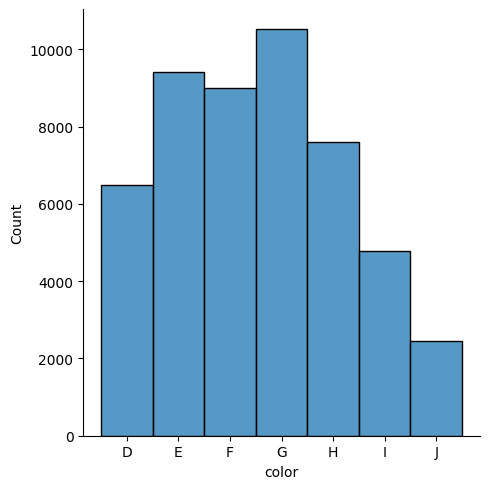

In [138]:
sns.displot(diamonds_clear['color'])

In [125]:
#распределения по размерам
px.histogram(diamonds_clear, x = 'carat', marginal = 'box')

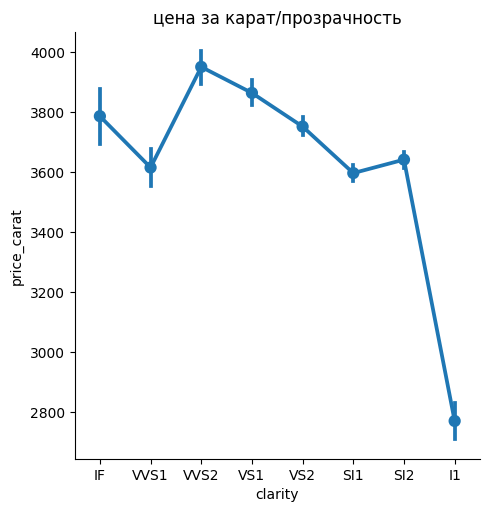

In [148]:
sns.catplot(data=diamonds_clear, x='clarity', y='price_carat', kind='point')
plt.title("цена за карат/прозрачность")
plt.show()

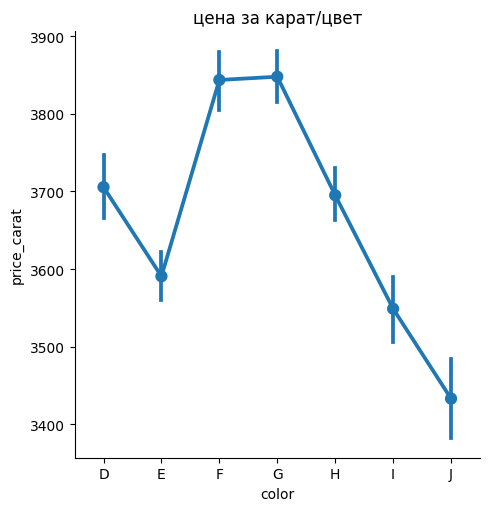

In [149]:
sns.catplot(data=diamonds_clear, x='color', y='price_carat', kind='point')
plt.title("цена за карат/цвет")
plt.show()

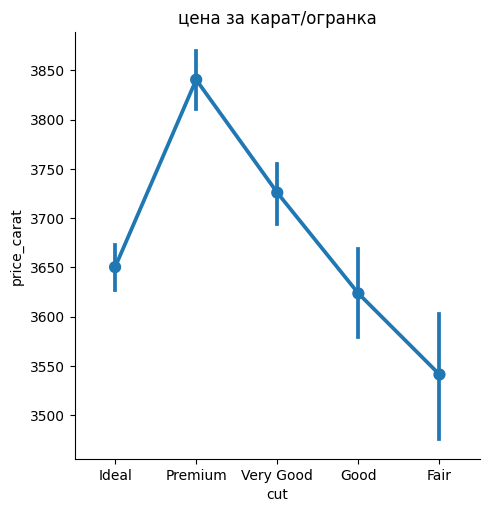

In [150]:
sns.catplot(data=diamonds_clear, x='cut', y='price_carat', kind='point')
plt.title("цена за карат/огранка")
plt.show()

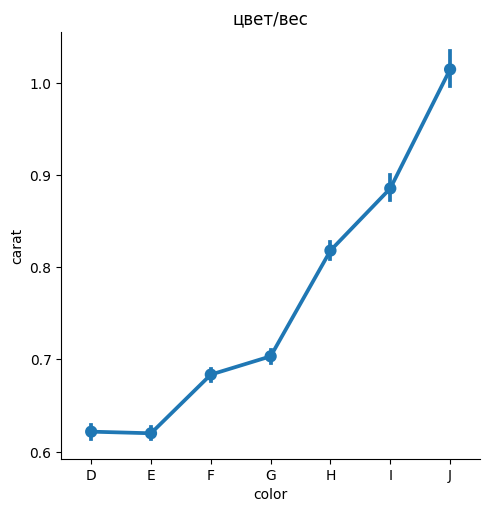

In [151]:
sns.catplot(data=diamonds_clear, x='color', y='carat', kind='point')
plt.title("цвет/вес")
plt.show()

Вывод: после удаления выбросов, картина незначительно поменялась, вероятнее всего, потому что доля выбросов небольшая, примерно 6,54%

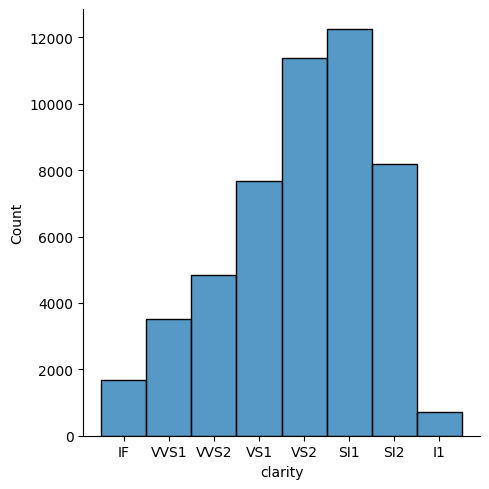

In [136]:
#прозрачностью
sns.displot(diamonds_clear['clarity'])

<Axes: >

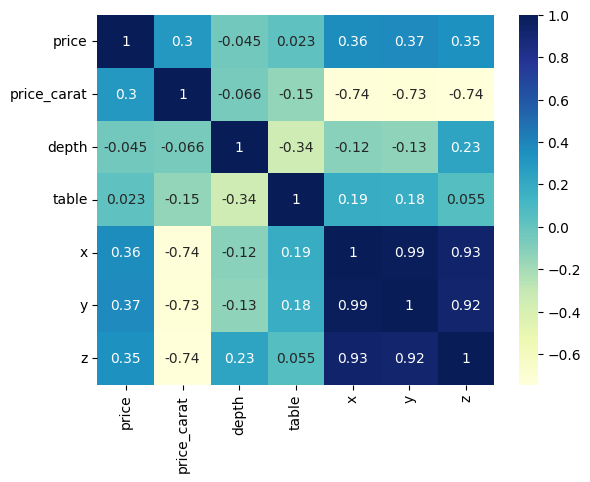

In [119]:
#Посмотрим также на зависимости в outliers
cols = ['price', 'price_carat', 'depth', 'table', 'x', 'y', 'z']
cor = outliers[cols].corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

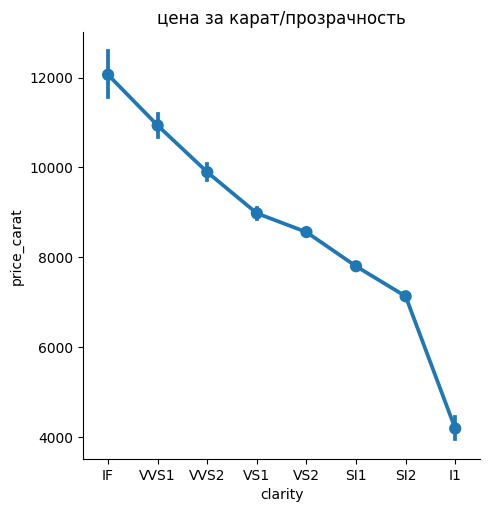

In [152]:
sns.catplot(data=outliers, x='clarity', y='price_carat', kind='point')
plt.title("цена за карат/прозрачность")
plt.show()

Среди топовых по цене камней самыми дорогими являются камни с прозрачностью IF

Среди "обычных камней" - WS2

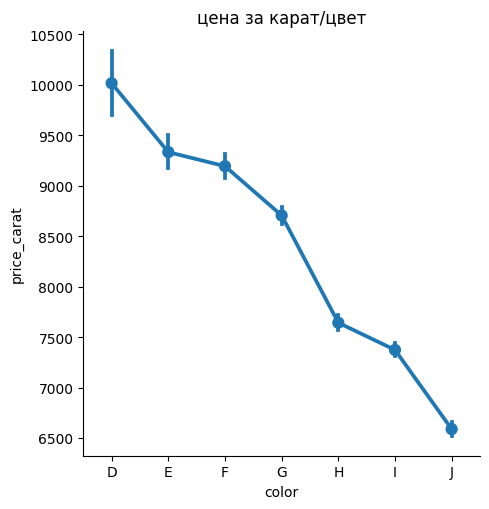

In [153]:
sns.catplot(data=outliers, x='color', y='price_carat', kind='point')
plt.title("цена за карат/цвет")
plt.show()

По цене за карат с большим перевесом лидирует D, затем идет E, F и толко на четвертом месте G, хотя в выборке "обычных камней" самым дорогим за карат был G

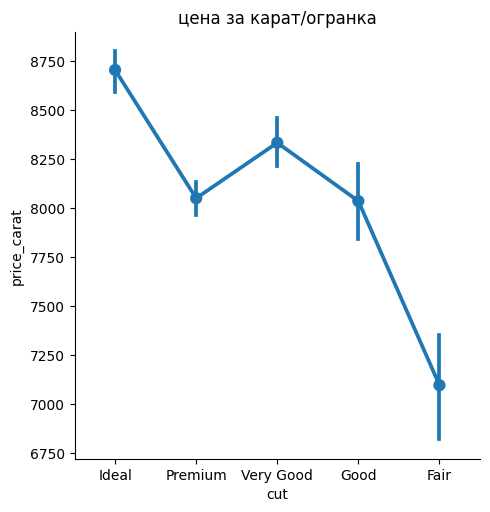

In [154]:
sns.catplot(data=outliers, x='cut', y='price_carat', kind='point')
plt.title("цена за карат/огранка")
plt.show()

Здесь на цену за карат  также влияет качество огранки, но на первом месте Ideal, а не Premiun

In [124]:
#Посмотрим также на распределение весов
#Будет ли среди топовых камней большая доля крупных
px.histogram(outliers, x = 'carat', marginal = 'box')

Результат логичен, здесь больше крупных камней

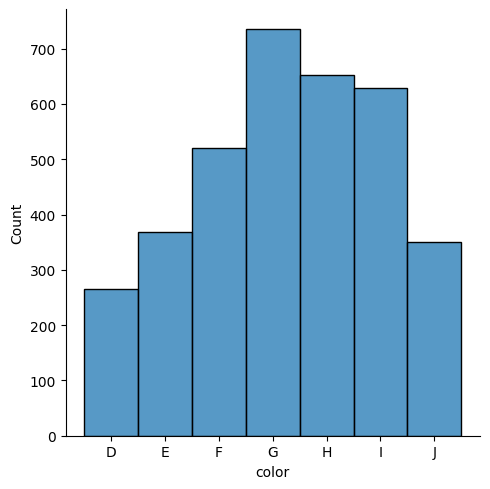

In [126]:
sns.displot(outliers['color'])

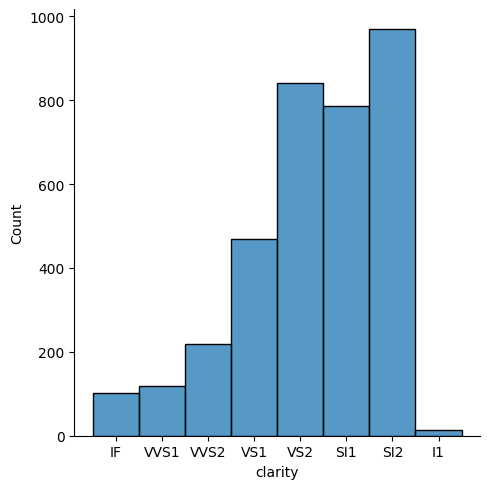

In [135]:
#прозрачностью
sns.displot(outliers['clarity'])

In [133]:
#Напоследок посчитаем корреляцию между ценой и весом для всех трех выборок
cor1 = diamonds_copy['price']. corr(diamonds_copy['carat'])
cor2 = diamonds_clear['price']. corr(diamonds_clear['carat'])
cor3 = outliers['price']. corr(outliers['carat'])
print('Корреляция в общем датафрейме =', cor1)
print('Корреляция в датафрейме, очещенном от выбрососв цены =', cor2)
print('Корреляция для "топовых" по цене камней =', cor3)

Корреляция в общем датафрейме = 0.9215420586591039
Корреляция в датафрейме, очещенном от выбрососв цены = 0.9158380039033823
Корреляция для "топовых" по цене камней = 0.3601383847919768


Так как x, y, z значительно коррелируют между собой, можем попробовать объединить их для вычисления объема камня

Появилась также идея проверить гипотезу относительно плотности камня

Попробую для каждого камня посчитать m/V и проверить обнаружаться ли какие-то взаимосвзяи
для проверки этой гипотезы создадим ещк одну копию датафрейма

**Выводы**

Для анализа общий датасет был разделен на 3 выборки:
*   -все значения;
*   -значения без выбросов по цене;
*   -только выбросы по цене(выборка по самым высоким ценам).

Так как большей статистической значимостью обладают только первые 2, основные выводы будут по ним.

Наибольшее влияние на цену брилианта оказывает его вес.


Так, например, камни цвета J, обладая характеристиками по прозрачности ниже среднего и самой высокой долей огранки Fair и Good, являются самыми дорогими.

Если не брать в расчет вес брилианта, то камни цвета F и G являются самыми дорогими. И наоборот, камни J - самые недорогие. Еще раз подчеркивается значение веса.

Примечательно, что коэфицент корреляции между ценой и весом по первой выборке = 0,92
При этом в выборке по топ ценам корреляция = 0,36
Также здесь самый дорогой цвет без учета веса - D (в общей выборке 3-е место), огранка - IDEAL, прозрачность IF. То есть, вес играет не решающую роль.
Для определения причин этого данных недостаточно. Могу предположить, что влияние могут оказывать такие факторы, как бренд, история камня,человеский фактор или ошибка в данных.

Также можно сделать вывод, что крупные камни встречаются реже остальных. Они же имеют не самую высокую степень прозрачностью и ограняются хуже остальных. Но качество огранки, скорее всего, связано с тем, что эти камни стараются подвергать минимальной обработке, чтобы сохранить их уникальность и вес.

В целом, брилианты имеют огранку высокого класса. Доля огранки  Fair и Good не привышает 12%














